In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In this notebook, I will explore the file structure of primatediversity data (as of 19/06/2025) to set up the cobraa workflow in an as expandable manner as possible.

In [2]:
dir_metadata = pd.read_csv("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Gorilla_individuals.txt",
                           sep="\t")
sorted_f = dir_metadata.loc[(dir_metadata.GENETIC_SEX == "F")
                      & (dir_metadata.AVG_COVERAGE_X < 40)].sort_values(by="PROP_COVERED_A", ascending=False)
for gvcf_folder in sorted_f.GVCF_FOLDER.unique():
    print(gvcf_folder)

Gorilla_gorilla_ssp
Gorilla_beringei_ssp


In [3]:
sorted_f.loc[sorted_f.GVCF_FOLDER == "Gorilla_beringei_ssp"]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y
13,SAMN01920475,SAMN01920475,SAMN01920475,SRS396876,PRJNA189439,Gorilla_beringei_graueri,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,graueri,F,F,28.478,0.977,22.522,0.991,10.960,0.277
0,SAMEA2697037,SAMEA2697037,SAMEA2697037,ERS525616,PRJEB3220,Gorilla_beringei_beringei,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,beringei,Unknown,F,26.505,0.972,24.672,0.991,15.623,0.392
20,SAMEA1692355,SAMEA1692355,SAMEA1692355,ERS168205,PRJEB3220,Gorilla_beringei_ssp,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,ssp,Unknown,F,28.873,0.972,28.485,0.991,19.484,0.244
18,SAMEA1692353,SAMEA1692353,SAMEA1692353,ERS168204,PRJEB3220,Gorilla_beringei_ssp,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,ssp,Unknown,F,31.781,0.971,30.734,0.990,17.445,0.331
7,SAMEA2697040,SAMEA2697040,SAMEA2697040,ERS525619,PRJEB3220,Gorilla_beringei_graueri,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,graueri,Unknown,F,25.974,0.971,25.102,0.991,9.026,0.346
9,SAMEA2697042,SAMEA2697042,SAMEA2697042,ERS525621,PRJEB3220,Gorilla_beringei_graueri,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,graueri,Unknown,F,26.862,0.967,24.913,0.988,11.132,0.268
2,SAMEA2697039,SAMEA2697039,SAMEA2697039,ERS525618,PRJEB3220,Gorilla_beringei_beringei,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,beringei,Unknown,F,26.797,0.965,21.427,0.985,22.984,0.326
8,SAMEA2697041,SAMEA2697041,SAMEA2697041,ERS525620,PRJEB3220,Gorilla_beringei_graueri,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,graueri,Unknown,F,21.720,0.965,20.122,0.989,12.491,0.278
14,SAMEA112482932,PD_0179,PD_0179,ERS14600283,PRJEB59576,Gorilla_beringei_ssp,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,ssp,Unknown,F,23.151,0.958,22.673,0.986,14.291,0.289
1,SAMEA2697038,SAMEA2697038,SAMEA2697038,ERS525617,PRJEB3220,Gorilla_beringei_beringei,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,beringei,Unknown,F,22.825,0.955,20.789,0.981,15.600,0.302


Using gvcfs for this stage - check if regions file can be used for iteration.

In [4]:
region_metadata = pd.read_csv("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Gorilla_regions_and_batches.txt",
                           sep="\t")

In [5]:
region_metadata

,REFERENCE_FOLDER,REGION,CONTIG_ID,START,END,BATCH,FEMALE_PLOIDY,MALE_PLOIDY
0,Gorilla_gorilla_ssp,NC_073224.2,NC_073224.2,0,243847345,0,2,2
1,Gorilla_gorilla_ssp,NC_086017.1,NC_086017.1,0,215253457,1,2,2
2,Gorilla_gorilla_ssp,NC_073227.2,NC_073227.2,0,215373162,2,2,2
3,Gorilla_gorilla_ssp,NC_073228.2,NC_073228.2,0,195332687,3,2,2
4,Gorilla_gorilla_ssp,NC_073229.2,NC_073229.2,0,199452338,4,2,2
5,Gorilla_gorilla_ssp,NC_073230.2,NC_073230.2,0,170803427,5,2,2
6,Gorilla_gorilla_ssp,NC_073231.2,NC_073231.2,0,158533252,6,2,2
7,Gorilla_gorilla_ssp,NC_073232.2,NC_073232.2,0,150804130,7,2,2
8,Gorilla_gorilla_ssp,NC_073233.2,NC_073233.2,0,147876701,8,2,2
9,Gorilla_gorilla_ssp,NC_073234.2,NC_073234.2,0,154228409,9,2,2


In [6]:
region_metadata.loc[region_metadata.FEMALE_PLOIDY == 2]

,REFERENCE_FOLDER,REGION,CONTIG_ID,START,END,BATCH,FEMALE_PLOIDY,MALE_PLOIDY
0,Gorilla_gorilla_ssp,NC_073224.2,NC_073224.2,0,243847345,0,2,2
1,Gorilla_gorilla_ssp,NC_086017.1,NC_086017.1,0,215253457,1,2,2
2,Gorilla_gorilla_ssp,NC_073227.2,NC_073227.2,0,215373162,2,2,2
3,Gorilla_gorilla_ssp,NC_073228.2,NC_073228.2,0,195332687,3,2,2
4,Gorilla_gorilla_ssp,NC_073229.2,NC_073229.2,0,199452338,4,2,2
5,Gorilla_gorilla_ssp,NC_073230.2,NC_073230.2,0,170803427,5,2,2
6,Gorilla_gorilla_ssp,NC_073231.2,NC_073231.2,0,158533252,6,2,2
7,Gorilla_gorilla_ssp,NC_073232.2,NC_073232.2,0,150804130,7,2,2
8,Gorilla_gorilla_ssp,NC_073233.2,NC_073233.2,0,147876701,8,2,2
9,Gorilla_gorilla_ssp,NC_073234.2,NC_073234.2,0,154228409,9,2,2


Test of heatmap visualization.

In [7]:
# Extract stats from cobraa file
def cobraa_read(cobraa_paths):
    log_l, gamma_l, ts_l, te_l = [], [], [], []
    for f in cobraa_paths:
        cobraa_file = open(f, 'r')
        cobraa_lines = cobraa_file.readlines()
        log_l.append(float(cobraa_lines[0].split(" ")[-1].strip()))
        gamma_l.append(float(cobraa_lines[-1].split(" ")[-1].strip()))
        ts_l.append(int(f.split("_")[2][2:])), te_l.append(int(f.split("_")[3][2:]))
    return pd.DataFrame({"log_likelihoods": log_l, "gamma": gamma_l, "ts": ts_l, "te": te_l})
        
file_list = glob.glob("../steps/cobraa/SAMEA2697037_D50_ts*_te*_final_parameters.txt")
cobraa_df = cobraa_read(file_list)

In [8]:
cobraa_df.sort_values(by="log_likelihoods")

,log_likelihoods,gamma,ts,te
42,-1.640052e+06,0.098077,4,32
88,-1.639988e+06,0.104966,4,30
11,-1.639975e+06,0.038178,4,38
95,-1.639963e+06,0.111023,6,32
36,-1.639911e+06,0.120728,6,30
...,...,...,...,...
62,-1.638997e+06,0.485279,28,34
53,-1.638994e+06,0.495781,26,32
96,-1.638981e+06,0.401981,22,32
109,-1.638978e+06,0.385737,24,32


<Axes: xlabel='ts', ylabel='te'>

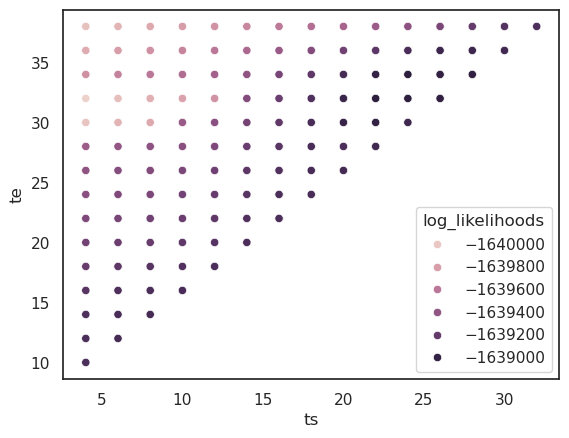

In [9]:
sns.scatterplot(cobraa_df, x="ts", y="te", hue="log_likelihoods", hue_norm=(cobraa_df.log_likelihoods.min(),
                                                                            cobraa_df.log_likelihoods.max()))

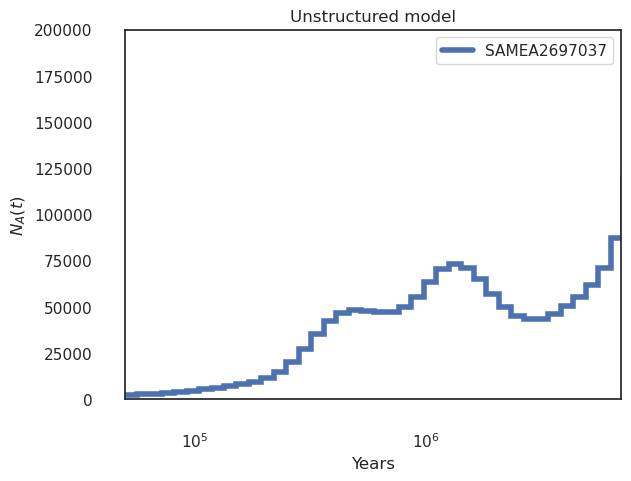

In [22]:
mu = 1.1e-08
gen = 19
final_params_file = "../steps/cobraa/SAMEA2697037_D50_unstructured_final_parameters.txt"
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="SAMEA2697037",linewidth=4,linestyle="solid",baseline=None)
plt.xlim(5e+04,7e+06)
plt.ylim(0,20e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.title('Unstructured model')
plt.show()

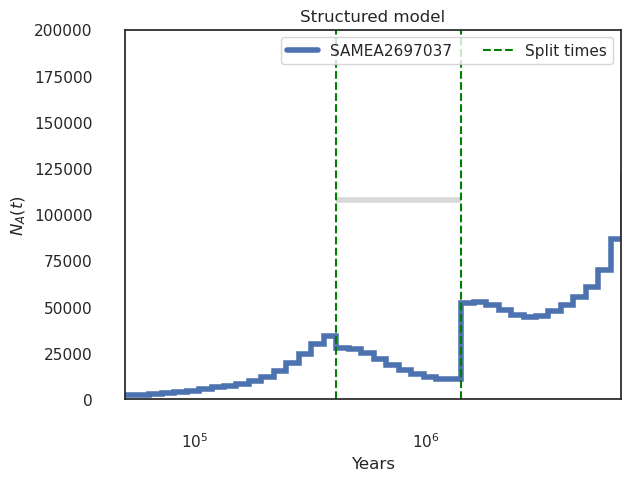

In [31]:
ts=22
te=32
final_params_file = "../steps/cobraa/SAMEA2697037_D50_ts{}_te{}_final_parameters.txt".format(ts, te)
final_params = np.loadtxt(final_params_file)
time_array = list(final_params[:,1])
time_array.insert(0,0)
time_array = np.array(time_array)
plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label="SAMEA2697037",linewidth=4,linestyle="solid",baseline=None) # plot population A inferred size
plt.stairs(edges=(time_array[ts:te+1]/mu)*gen,values=(1/final_params[ts:te,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3) # plot population B inferred size 
plt.axvline((time_array[ts]/mu)*gen,color="green",linestyle="dashed")  
plt.axvline((time_array[te]/mu)*gen,label="Split times",color="green",linestyle="dashed")    

plt.xlim(5e+04,7e+06)
plt.ylim(0,20e+04)
plt.xscale('log')
plt.ylabel('$N_A(t)$')
plt.xlabel('Years')
plt.title('Structured model')
plt.tick_params(which='major',length=20)
plt.tick_params(which='minor',length=10)
plt.legend(ncol=2)
plt.show()